# Business Problem 
### Problem Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Features:

* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [197]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats as st
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [198]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [199]:
# Loading Dataset  
dataset = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
dataset.head()


,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [200]:
dataset.columns

Index(['65', 'Female', '0.7', '0.1', '187', '16', '18', '6.8', '3.3', '0.9',
       '1'],
      dtype='object')

In [201]:
dataset.rename({"65":"Age","Female":"Gender","0.7":"Total Bilirubin",'0.1':"Direct Bilirubin",'187':'Alkaline Phosphotase','16':'Alamine Aminotransferase','18':'Aspartate Aminotransferase','6.8':'Total Protiens','3.3':'Albumin','0.9':'Albumin and Globulin Ratio','1':'Target'},axis = 1, inplace = True)


## Basic Checks

In [202]:
dataset ## checking head and tail

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [203]:
dataset.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [204]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total Bilirubin             582 non-null    float64
 3   Direct Bilirubin            582 non-null    float64
 4   Alkaline Phosphotase        582 non-null    int64  
 5   Alamine Aminotransferase    582 non-null    int64  
 6   Aspartate Aminotransferase  582 non-null    int64  
 7   Total Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin and Globulin Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB
None


In [205]:
dataset.describe() ## Summary Statistics

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [206]:
dataset.Target.unique()

array([1, 2], dtype=int64)

In [207]:
dataset.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [208]:
# Shape of Dataset  
print(dataset.shape)

(582, 11)


In [209]:
print(dataset.dtypes)

Age                             int64
Gender                         object
Total Bilirubin               float64
Direct Bilirubin              float64
Alkaline Phosphotase            int64
Alamine Aminotransferase        int64
Aspartate Aminotransferase      int64
Total Protiens                float64
Albumin                       float64
Albumin and Globulin Ratio    float64
Target                          int64
dtype: object


In [210]:
# Description:
print(dataset.describe())

              Age  Total Bilirubin  Direct Bilirubin  Alkaline Phosphotase  \
count  582.000000       582.000000        582.000000            582.000000   
mean    44.711340         3.303265          1.488488            290.754296   
std     16.181921         6.213926          2.810324            243.108929   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.250000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     57.750000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine Aminotransferase  Aspartate Aminotransferase  Total Protiens  \
count                582.000000                  582.000000      582.000000   
mean                  80.824742                  110.068729        6.482646   
std                  182.757696                  289.141876 

## Target Feature

Liver Disease Patients      : 415
Non Liver Disease Patients  : 167


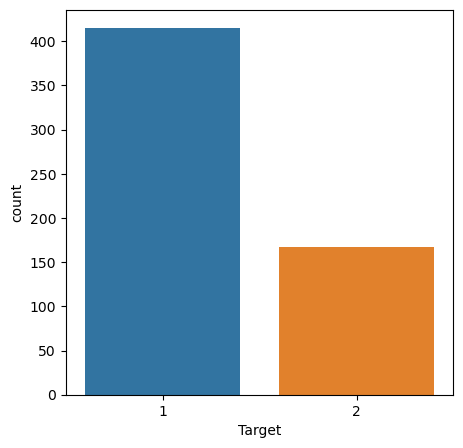

In [211]:
# Target feature:
print("Liver Disease Patients      :", dataset['Target'].value_counts()[1])
print("Non Liver Disease Patients  :", dataset['Target'].value_counts()[2])

# Visualization:
plt.figure(figsize=(5,5))
sns.countplot(x='Target', data=dataset)
plt.show()

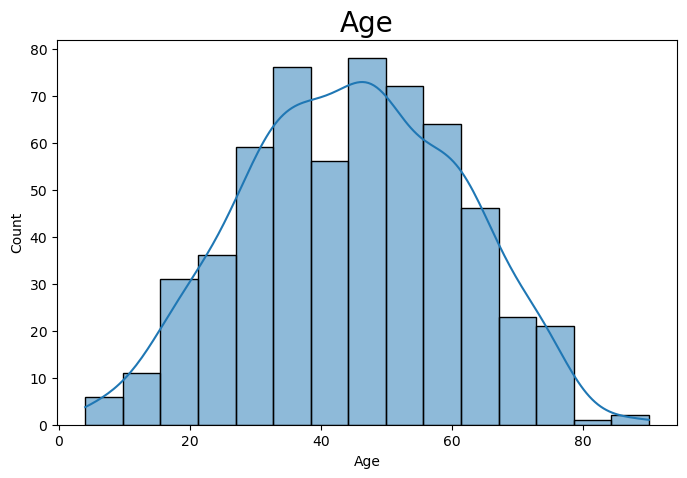

In [212]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(dataset['Age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

Total Male   : 441
Total Female : 141


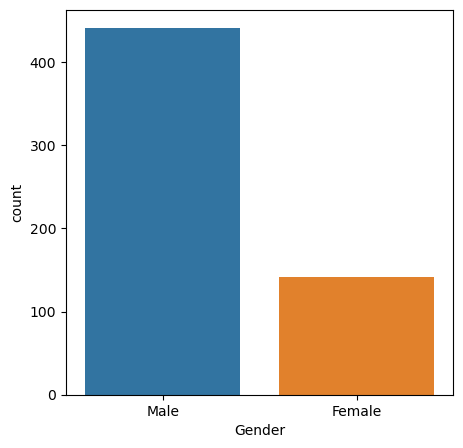

In [213]:
# Gender feature:
print("Total Male   :", dataset['Gender'].value_counts()[0])
print("Total Female :", dataset['Gender'].value_counts()[1])

# Visualization:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data= dataset)
plt.show()

## Encoding - Handling Categorical Data 

In [214]:
# Manual Encoding
dataset.replace({'Male':1, 'Female':0}, inplace=True)

In [215]:
dataset.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [216]:
dataset.columns

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin and Globulin Ratio', 'Target'],
      dtype='object')

## EDA - Exploratory Data Analysis 

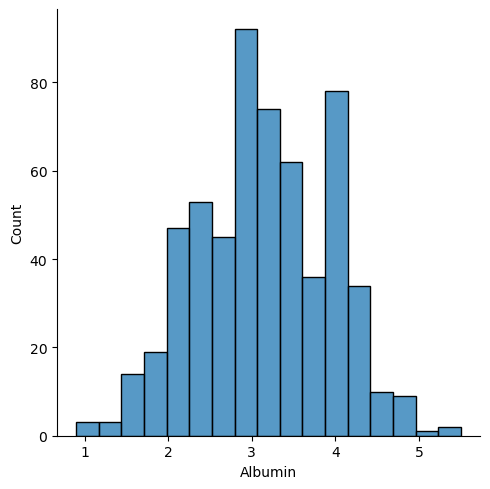

In [217]:
sns.displot(dataset['Albumin'])
plt.show()

## Univariate Analysis


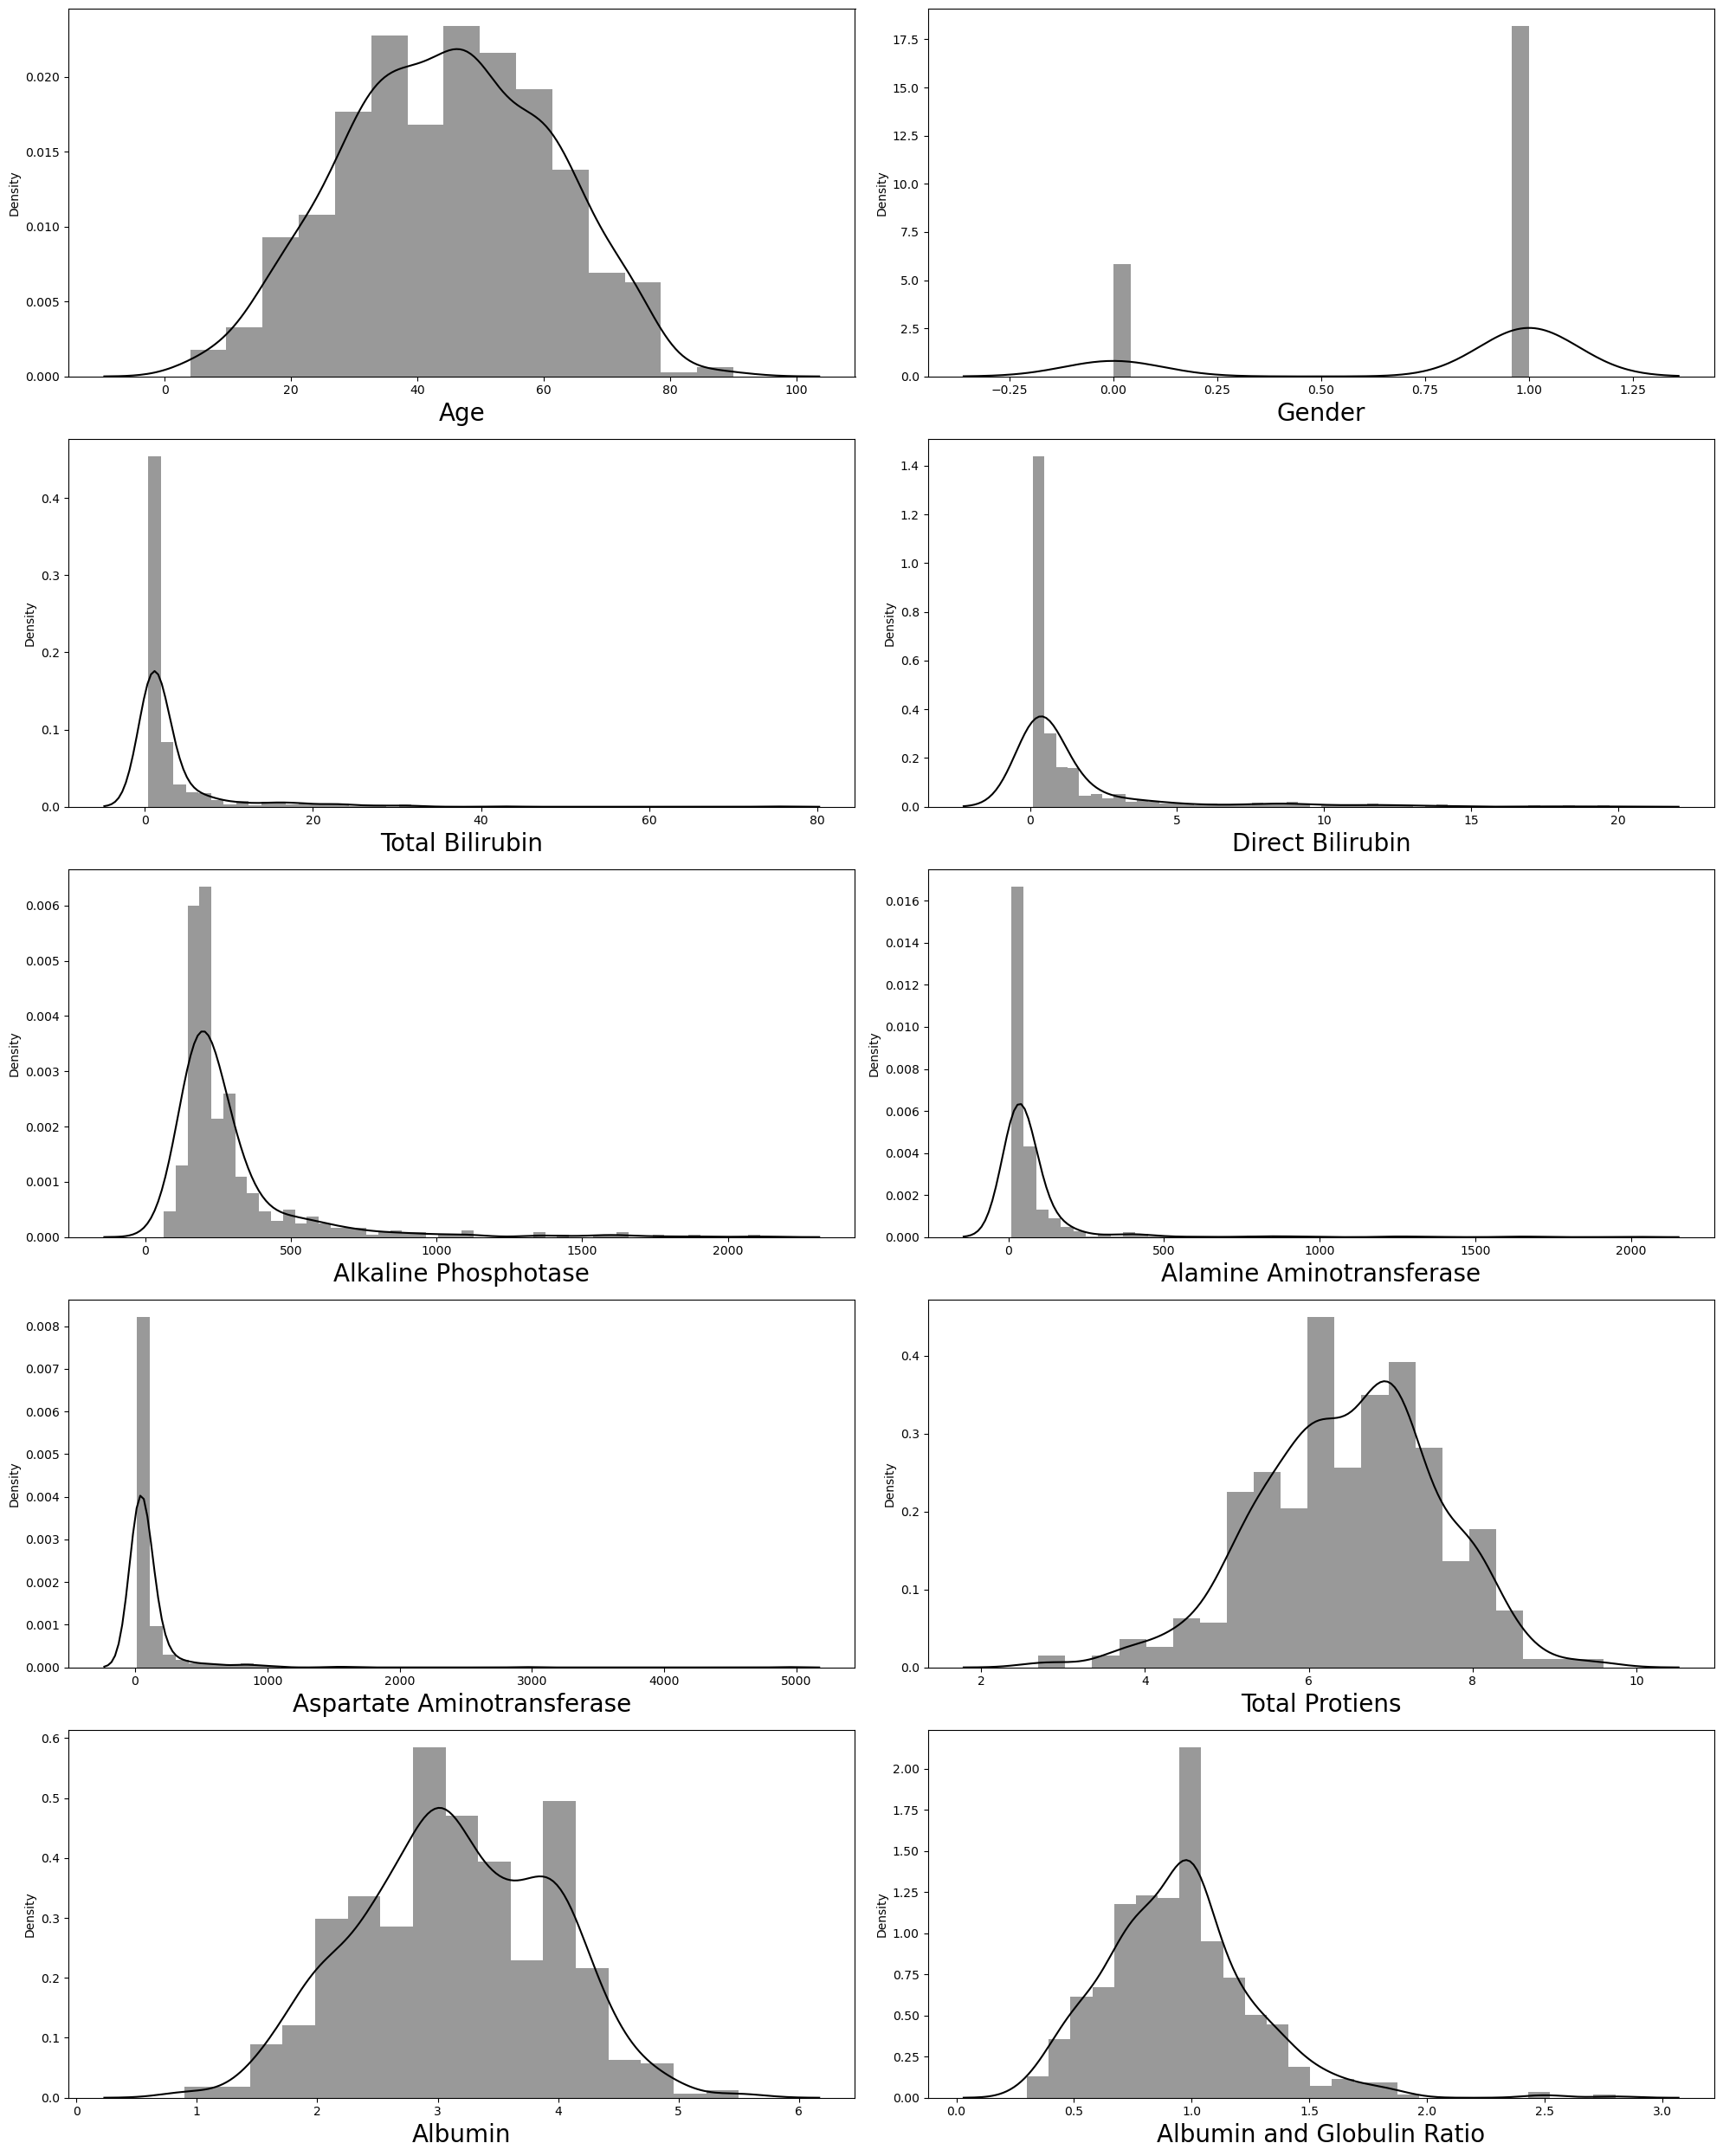

In [218]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in dataset:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(x=dataset[column],kde=True, color='k')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis

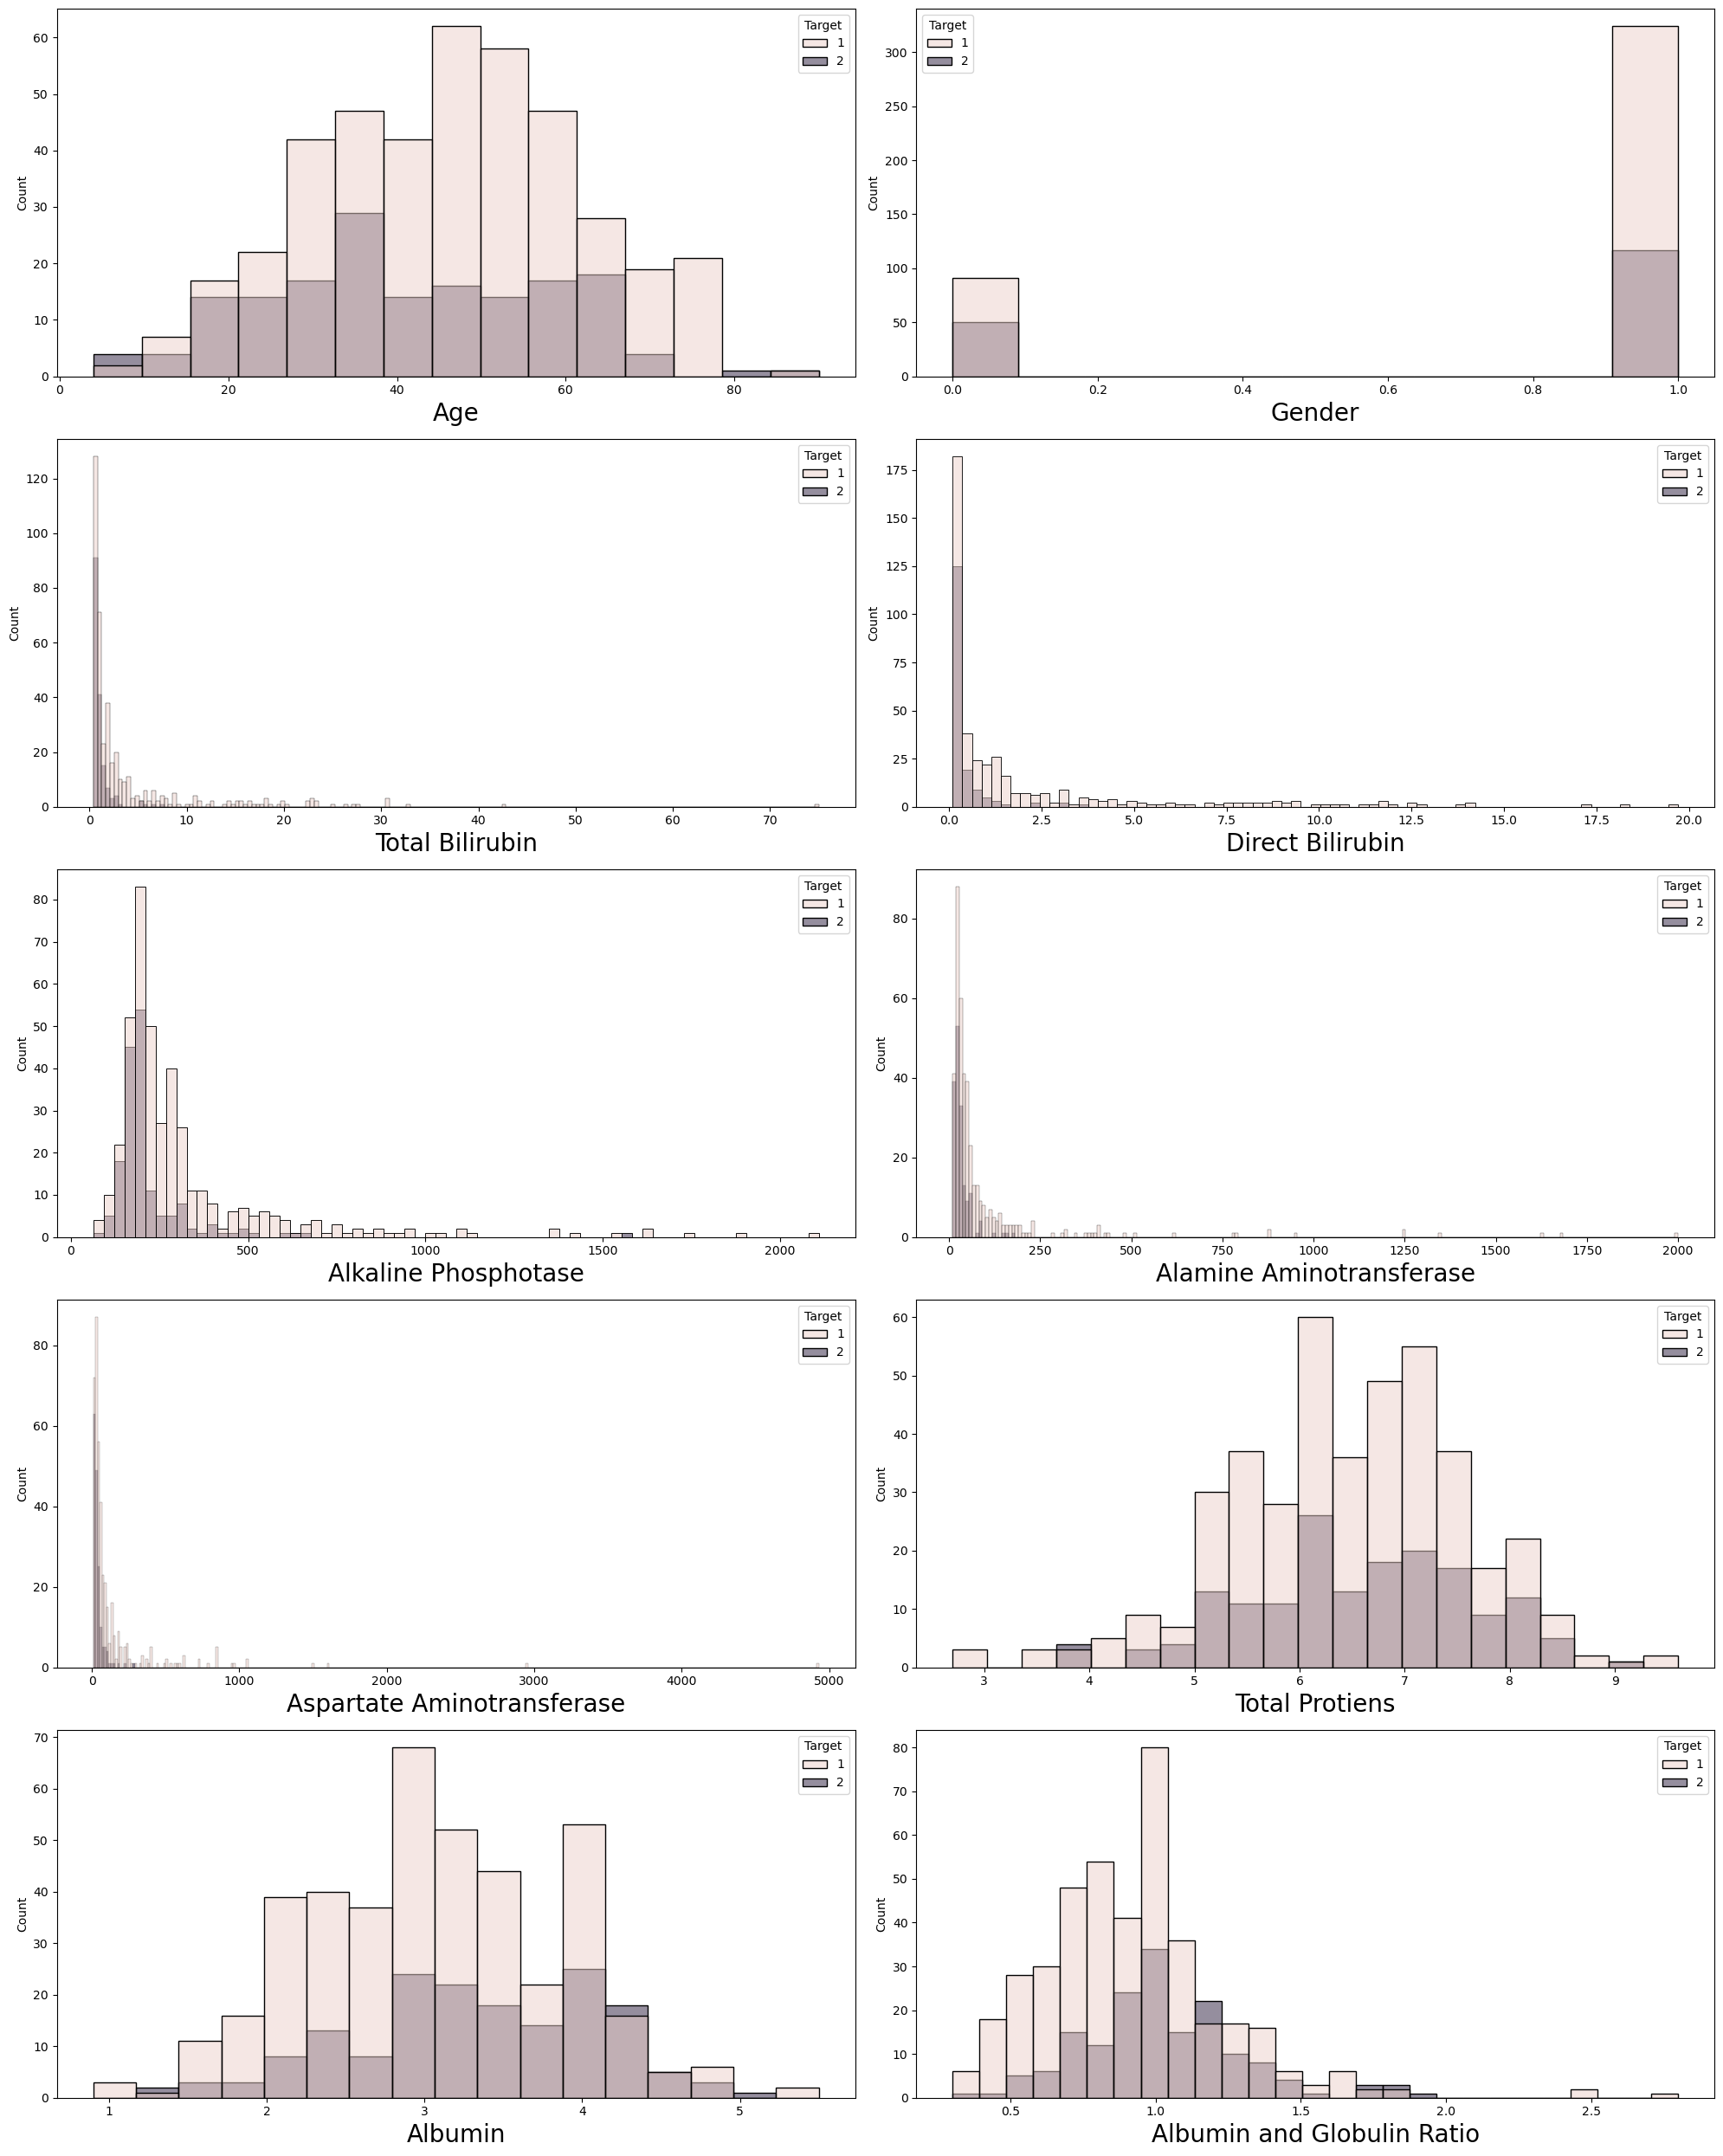

In [219]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in dataset:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=dataset[column],hue=dataset.Target)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


## Insights from Bivariate Analysis
- **Age vs Target** : Age between 40 and 60 are more prone to liver disease, as liver function deteriotes with age.
- **Gender vs Target** : Males exhibit a higher prevalence of liver disease compared to females, as the count of males with liver disease is larger than that of females.
- **TotalBilirubin vs Target** :Patients with liver disease generally have higher count bilirubin levels compared to those without liver disease.
The maximum bilirubin levels in liver disease patients are significantly elevated, which indicates a strong relationship between bilirubin levels and liver function.
- **Direct Bilirubin vs Target** :Patients without liver disease have lower direct bilirubin levels, usually concentrated around the normal range.
Patients with liver disease exhibit a wider distribution of direct bilirubin levels, with a significant number of cases where Direct Bilirubin is elevated, confirming its association with liver dysfunction.
- **Alkaline Phosphates vs Target** :Patients with liver disease typically show higher ALP levels than those without liver disease.
The distribution of ALP in liver disease patients is wider, suggesting more variability in this enzyme's levels.
- **Alamine Aminotransferase vs Target** :Higher ALT levels are seen in patients with liver disease.
There are outliers among liver disease patients, showing extremely elevated ALT, which might indicate more severe liver injury.
- **Aspartate Aminotransferase vs Target**:Elevated AST levels are common in liver disease patients.
AST levels are typically higher in liver disease patients, with more extreme cases exhibiting high outliers.
- **Total Protiens vs Target**:Patients with liver disease have lower total protein levels compared to those without liver disease.
The distribution is indicating that most liver disease patients have relatively low total proteins.
- **Albumin	Albumin vs Target** :Patients with liver disease showed lower levels of albumin compared to those without liver disease, which is consistent with impaired liver function.
The median albumin levels are distinctly lower in liver disease patients.
- **Albumin	Albumin and Globulin Ratio vs Target** : Patients with liver disease have a lower A/G ratio, indicating an imbalance in protein production due to liver dysfunction.
The distribution of A/G ratio for liver disease patients is skewed towards the lower side, with some outliers reflecting severely reduced ratios.

## Data Preprocessing

In [220]:
# Checking Missing Null Values : 
dataset.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

- 'Albumin and Globulin_Ratio' feature contain 4 NaN values.

## Handling Missing Values

In [221]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(dataset['Albumin and Globulin Ratio'].median())
print(dataset['Albumin and Globulin Ratio'].mean())

0.94
0.947145328719723


In [222]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
dataset['Albumin and Globulin Ratio'] = dataset['Albumin and Globulin Ratio'].fillna(dataset['Albumin and Globulin Ratio'].median())

In [223]:
## Data Cleaning, droping duplicates
dataset = dataset.drop_duplicates()
print( dataset.shape )


(569, 11)


In [224]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=dataset['Total Protiens'].mean() + 3* dataset['Total Protiens'].std()
lower_boundary=dataset['Total Protiens'].mean() - 3* dataset['Total Protiens'].std()

print(dataset['Total Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.495782073813708
3.2282322496318008
9.763331897995617


## Outliers

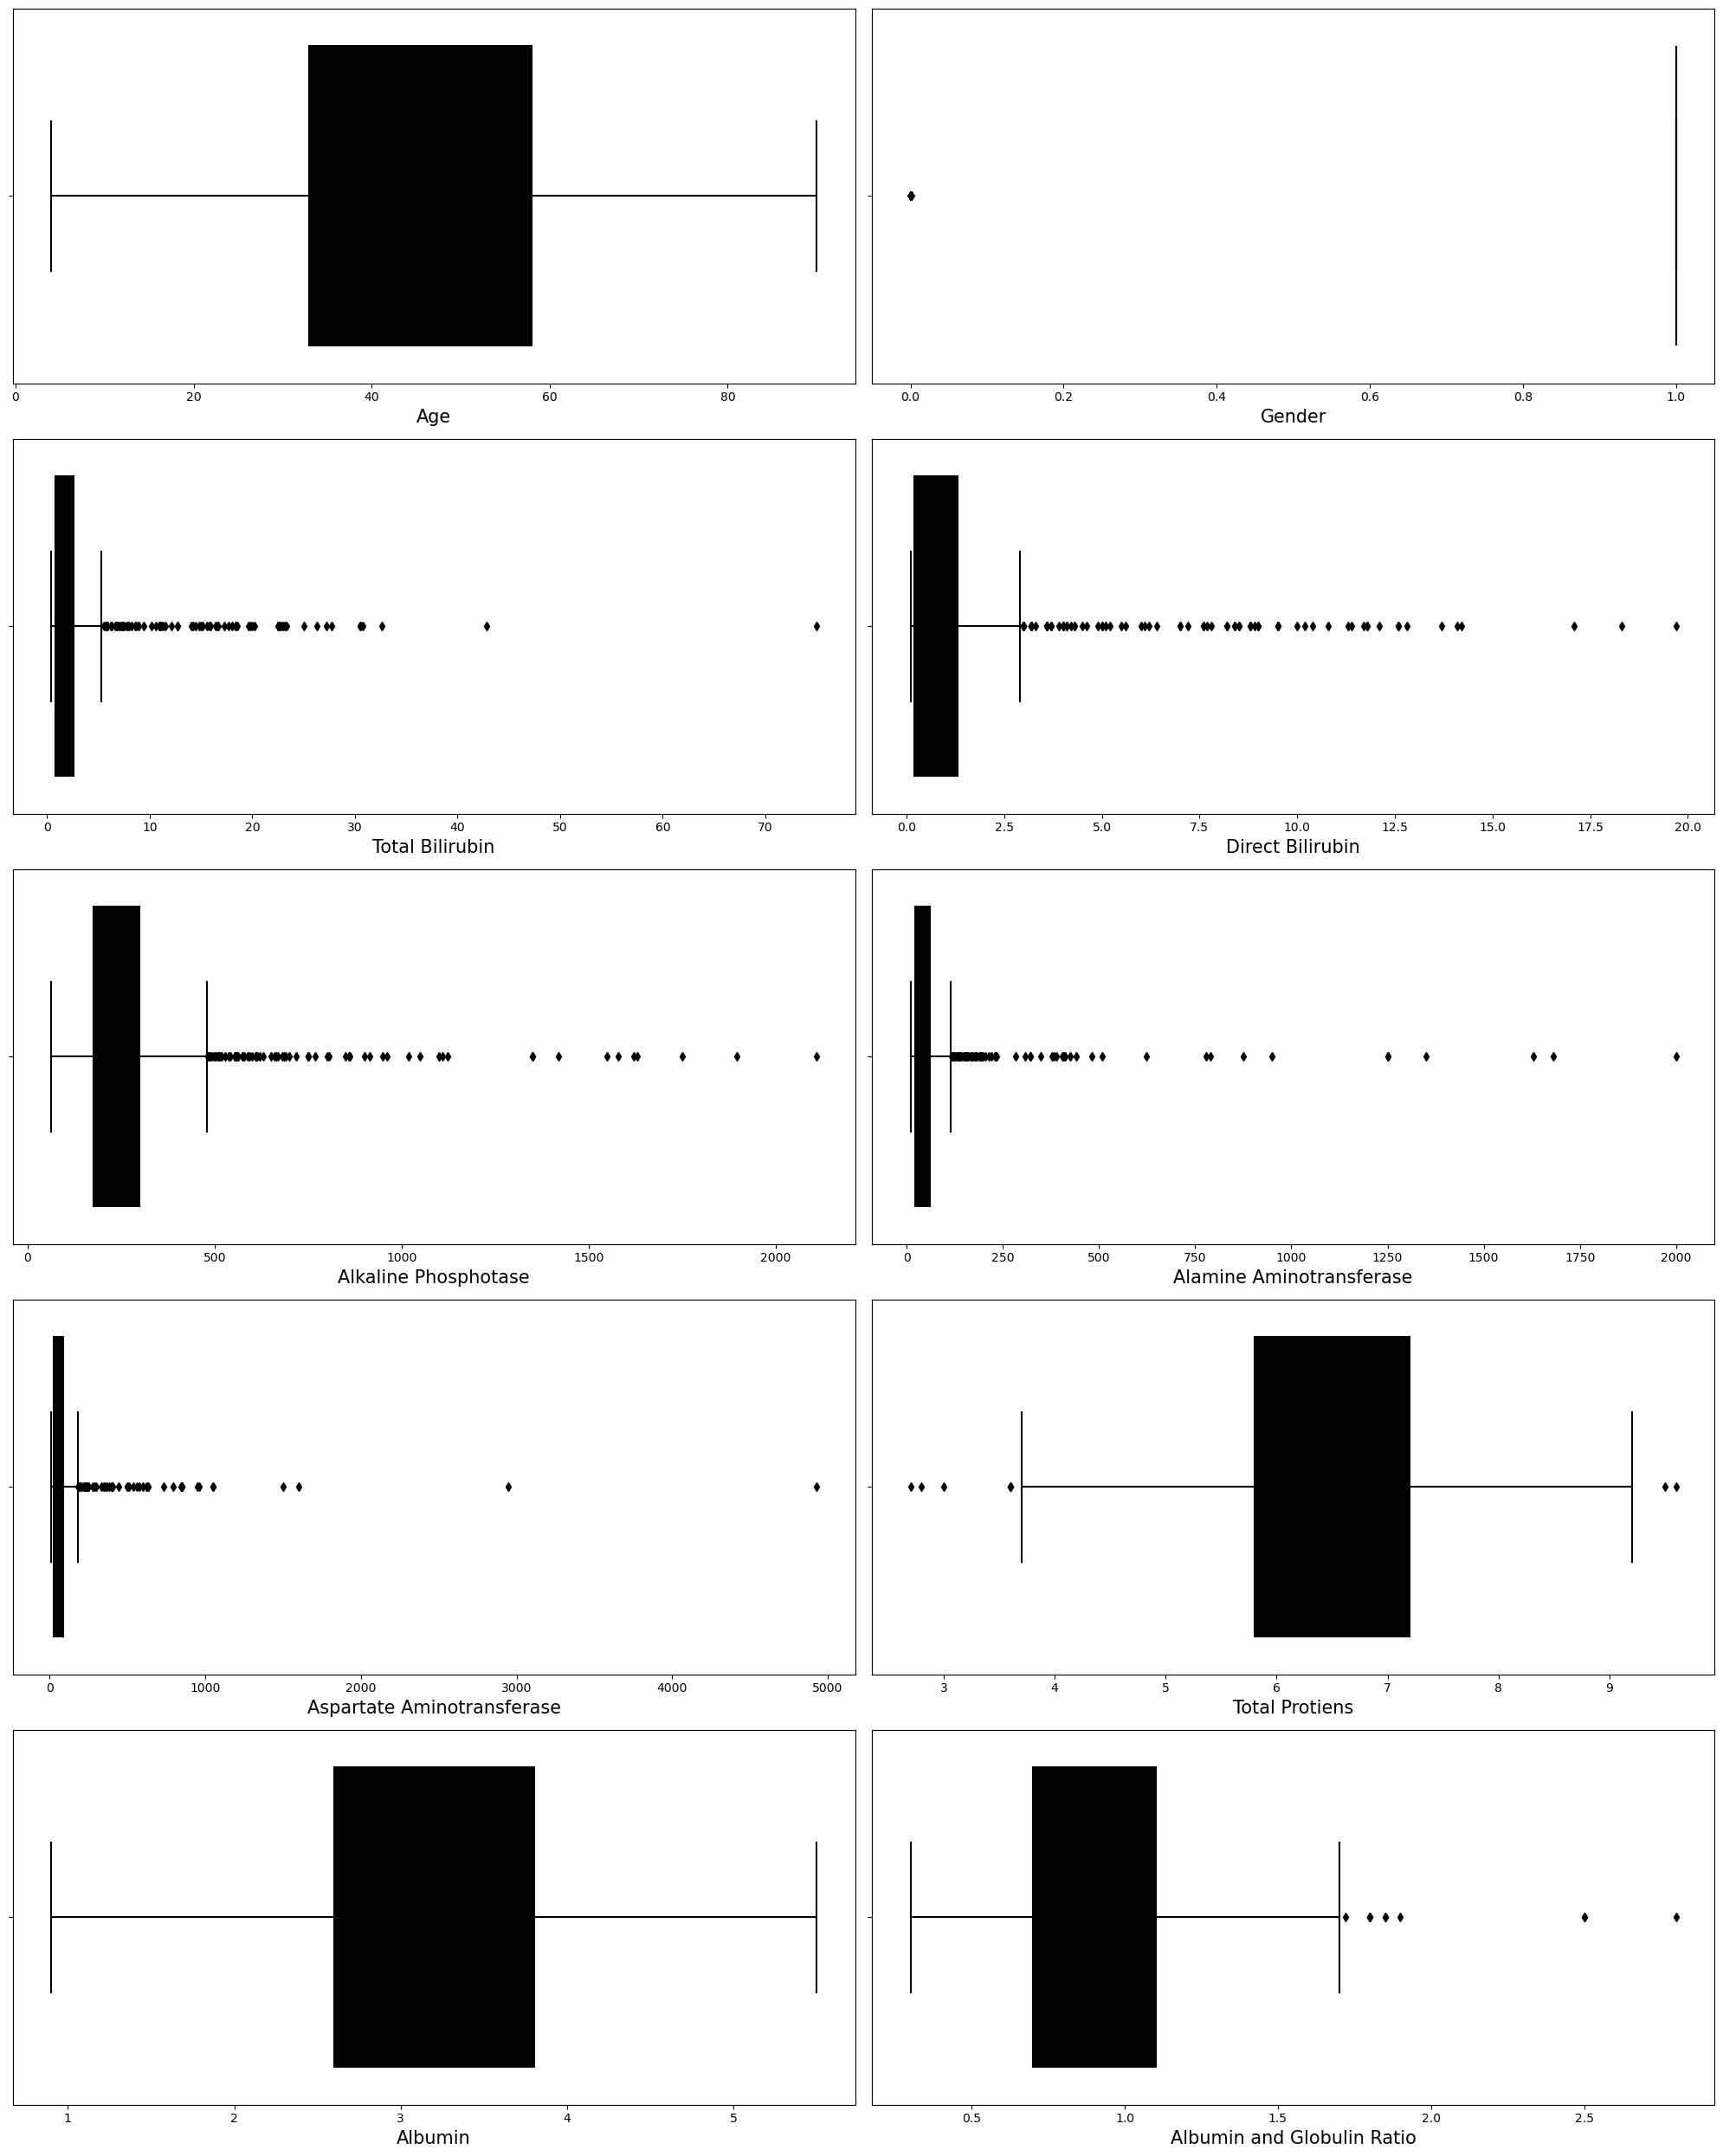

In [225]:
## Creating box plot to check the outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in dataset:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(x=dataset[column], color='k')
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [226]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_limit=dataset['Total Protiens'].mean() + 3* dataset['Total Protiens'].std()
lower_limit=dataset['Total Protiens'].mean() - 3* dataset['Total Protiens'].std()

print(dataset['Total Protiens'].mean())
print(lower_limit)
print(uppper_limit)

6.495782073813708
3.2282322496318008
9.763331897995617


In [227]:
##### Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_limit=dataset['Albumin'].mean() + 3* dataset['Albumin'].std()
lower_limit=dataset['Albumin'].mean() - 3* dataset['Albumin'].std()

print(dataset['Albumin'].mean())
print(lower_limit)
print(uppper_limit)

3.148681898066784
0.7562151400847199
5.541148656048848


In [228]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = dataset['Total Bilirubin'].quantile(0.75)-dataset['Total Bilirubin'].quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Total Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Total Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Total Bilirubin'] >= upper_bridge, 'Total Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [229]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = dataset['Alkaline Phosphotase'].quantile(0.75) - dataset['Alkaline Phosphotase'].quantile(0.25)

# Extreme outlierslower_bridge = dataset['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alkaline Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alkaline Phosphotase'] >= upper_bridge, 'Alkaline Phosphotase'] = upper_bridge

-4.6000000000000005
664.0


In [230]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries#:
IQR = dataset['Alamine Aminotransferase'].quantile(0.75) - dataset['Alamine Aminotransferase'].quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alamine Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alamine Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alamine Aminotransferase'] >= upper_bridge, 'Alamine Aminotransferase'] = upper_bridge

-88.0
171.0


In [231]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = dataset['Albumin and Globulin Ratio'].quantile(0.75) - dataset['Albumin and Globulin Ratio'].quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Albumin and Globulin Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Albumin and Globulin Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)


# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Albumin and Globulin Ratio'] >= upper_bridge, 'Albumin and Globulin Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [232]:
dataset.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,1,8.0,5.5,664,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [233]:
# Description after deal with outliers by IQR:
dataset.describe()


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,44.813708,0.755712,2.252724,1.500000,267.063269,53.040422,109.541301,6.495782,3.148682,0.946450,1.288225
std,16.234432,0.430042,2.387939,2.835117,146.641772,45.575314,291.111322,1.089183,0.797489,0.311056,0.453335
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,8.000000,19.700000,664.000000,171.000000,4929.000000,9.600000,5.500000,2.300000,2.000000


In [234]:
dataset.shape


(569, 11)

## Feature Selection

In [235]:
data = dataset.corr()

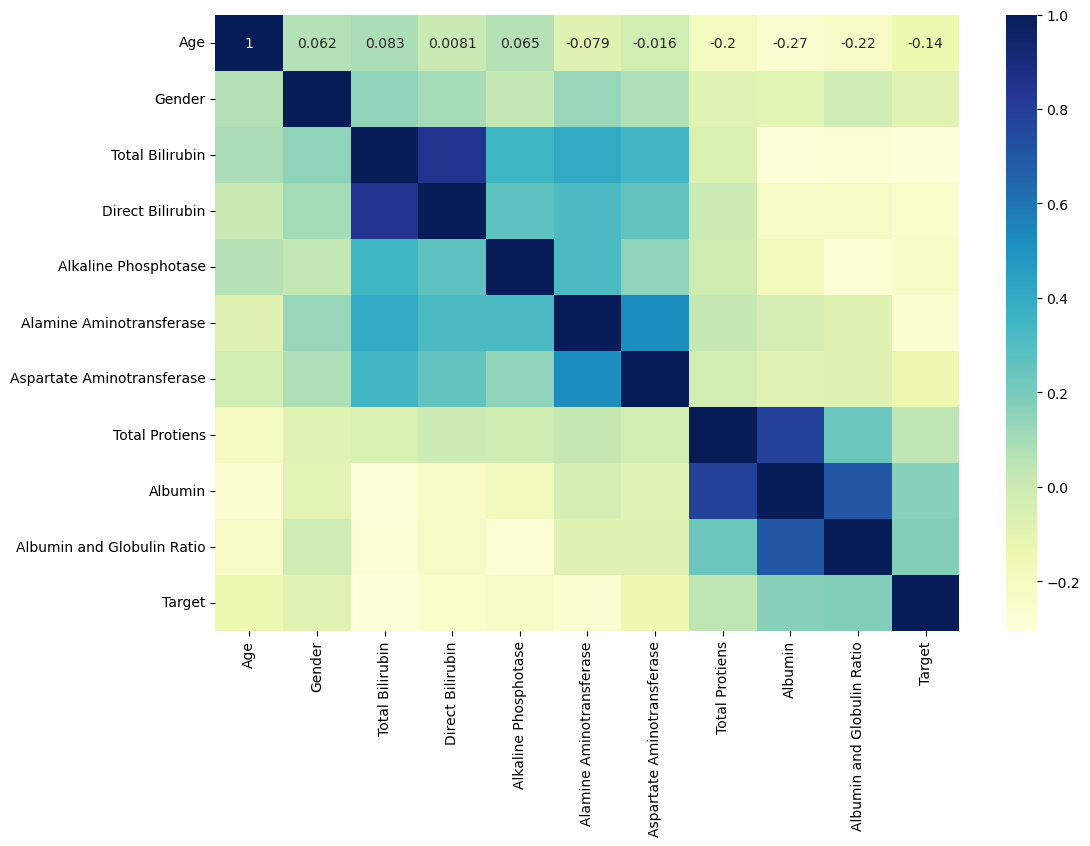

In [236]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
set = sns.heatmap(data, annot= True, cmap='YlGnBu')
plt.show()

#### There is Multi-Collinearity found on our dataset.

In [237]:
dataset.columns

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin and Globulin Ratio', 'Target'],
      dtype='object')

## Model Creation

In [238]:
# to split train and test set  
from sklearn.model_selection import train_test_split

In [239]:
X = dataset.iloc[:,:-1]
y = dataset['Target']

In [240]:
y


0      1
1      1
2      1
3      1
4      1
      ..
577    2
578    1
579    1
580    1
581    2
Name: Target, Length: 569, dtype: int64

In [241]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [242]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 405, 2: 164})
After SMOTE  :  Counter({1: 376, 2: 376})


In [243]:
# Split X and y into train and test sets
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [244]:
# Print number of observations in X_train, X_test, y_train, y_test 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 10) (114, 10) (455,) (114,)


In [245]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
6,Aspartate Aminotransferase,10088.390703
4,Alkaline Phosphotase,2443.802683
5,Alamine Aminotransferase,1662.820929
3,Direct Bilirubin,192.306637
2,Total Bilirubin,133.474319
0,Age,62.643329
8,Albumin,3.203924
9,Albumin and Globulin Ratio,1.835992
1,Gender,0.905346


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

## Machine Learning Models

In [246]:
## Importing Libaries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score

In [247]:
def predict(Class_Model): ## Defining a function 
    print(f'Model Name : {Class_Model}') ## Object Creation
    model = Class_Model.fit(X_train, y_train) ## Training the data
    print(f'Training score : {model.score(X_train,y_train)*100}') ## Training data score
    y_predict = model.predict(X_test) ## Predicting test data
    print(f' Predictions are : {y_predict}') ## Predicted data
    print('\n')
    print(f'MODEL EVALUATION')
    conf_matrix= confusion_matrix(y_test, y_predict)
    print(f'confusion matrix')
    print(conf_matrix)
    print(f'Classification Report')
    print(classification_report(y_test,y_predict))
    print(f'f1_score: {f1_score(y_test,y_predict)}')
    print(f'SMOTE DATA')
    print(f'Model Name : {Class_Model}')
    model = Class_Model.fit(X_smote, y_smote)
    print(f'Training score : {model.score(X_smote, y_smote)}')
    y_predict_Smote = model.predict(X_test)
    print(f' Predictions are : {y_predict_Smote}')
    print('\n')
    print(f'MODEL EVALUATION')
    conf_matrix= confusion_matrix(y_test, y_predict_Smote)
    print(f'Confusion matrix')
    print(conf_matrix)
    print(f'Classification Report')
    print(classification_report(y_test,y_predict_Smote))
    print(f'f1_score: {f1_score(y_test,y_predict_Smote)}')

In [248]:
## Logistic Regression
predict(LogisticRegression())

Model Name : LogisticRegression()
Training score : 70.98901098901099
 Predictions are : [1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1]


MODEL EVALUATION
confusion matrix
[[72  8]
 [25  9]]
Classification Report
              precision    recall  f1-score   support

           1       0.74      0.90      0.81        80
           2       0.53      0.26      0.35        34

    accuracy                           0.71       114
   macro avg       0.64      0.58      0.58       114
weighted avg       0.68      0.71      0.68       114

f1_score: 0.8135593220338985
SMOTE DATA
Model Name : LogisticRegression()
Training score : 0.7473404255319149
 Predictions are : [1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 2 1 

In [249]:
## Random Forest Classifier
predict(RandomForestClassifier())

Model Name : RandomForestClassifier()
Training score : 100.0
 Predictions are : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 2 2 1]


MODEL EVALUATION
confusion matrix
[[68 12]
 [27  7]]
Classification Report
              precision    recall  f1-score   support

           1       0.72      0.85      0.78        80
           2       0.37      0.21      0.26        34

    accuracy                           0.66       114
   macro avg       0.54      0.53      0.52       114
weighted avg       0.61      0.66      0.62       114

f1_score: 0.7771428571428571
SMOTE DATA
Model Name : RandomForestClassifier()
Training score : 1.0
 Predictions are : [1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 2 1 2
 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 2 1 2 1 1 

In [250]:
## AdaBoostClassifier
predict(AdaBoostClassifier())

Model Name : AdaBoostClassifier()
Training score : 82.41758241758241
 Predictions are : [1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1
 1 2 1]


MODEL EVALUATION
confusion matrix
[[66 14]
 [20 14]]
Classification Report
              precision    recall  f1-score   support

           1       0.77      0.82      0.80        80
           2       0.50      0.41      0.45        34

    accuracy                           0.70       114
   macro avg       0.63      0.62      0.62       114
weighted avg       0.69      0.70      0.69       114

f1_score: 0.7951807228915662
SMOTE DATA
Model Name : AdaBoostClassifier()
Training score : 0.8537234042553191
 Predictions are : [1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 2 2 2 1 1 2 1 2 1 2
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 

In [251]:
## Gradient Boosting Classifier
predict(GradientBoostingClassifier())

Model Name : GradientBoostingClassifier()
Training score : 94.72527472527472
 Predictions are : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1]


MODEL EVALUATION
confusion matrix
[[71  9]
 [23 11]]
Classification Report
              precision    recall  f1-score   support

           1       0.76      0.89      0.82        80
           2       0.55      0.32      0.41        34

    accuracy                           0.72       114
   macro avg       0.65      0.61      0.61       114
weighted avg       0.69      0.72      0.69       114

f1_score: 0.8160919540229885
SMOTE DATA
Model Name : GradientBoostingClassifier()
Training score : 0.9441489361702128
 Predictions are : [1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1
 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 2 2 

In [252]:
## "KNN
predict(KNeighborsClassifier())

Model Name : KNeighborsClassifier()
Training score : 78.02197802197803
 Predictions are : [1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1
 2 2 1]


MODEL EVALUATION
confusion matrix
[[66 14]
 [22 12]]
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.82      0.79        80
           2       0.46      0.35      0.40        34

    accuracy                           0.68       114
   macro avg       0.61      0.59      0.59       114
weighted avg       0.66      0.68      0.67       114

f1_score: 0.7857142857142856
SMOTE DATA
Model Name : KNeighborsClassifier()
Training score : 0.8351063829787234
 Predictions are : [1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 2 1 2
 1 2 2 2 1 2 1 1 2 1 2 2 1 1 1 2 2 2 2 1 1 2 1 2 1 1 2 1 1 1 2 2 1 

In [253]:
Models=[]
Models.append(('LR',LogisticRegression()))
Models.append(('RF',RandomForestClassifier()))
Models.append(('AD',AdaBoostClassifier()))
Models.append(('GB',GradientBoostingClassifier()))
Models.append(('KNN',KNeighborsClassifier()))
Models

[('LR', LogisticRegression()),
 ('RF', RandomForestClassifier()),
 ('AD', AdaBoostClassifier()),
 ('GB', GradientBoostingClassifier()),
 ('KNN', KNeighborsClassifier())]

In [254]:
## Checking Cross validation scores
from sklearn.model_selection import KFold, cross_val_score
my_cv = []
my_names = []

for name, model in Models:
    cv = cross_val_score(model,X_smote,y_smote,cv=10,scoring='f1')
    my_names.append(name)
    my_cv.append(cv)
    scores = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(scores)

LR 0.697308 (0.113724)
RF 0.794146 (0.075271)
AD 0.740947 (0.083980)
GB 0.780495 (0.091620)
KNN 0.713897 (0.082271)


# Hyperparameter Tuning

In [255]:
## Importing randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [256]:
## Creating dictionary for Parameters
param_distributions = {
    'n_estimators': [100,120,150,180,200,240],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[2,4,6,12,15,20],
    'max_features':['sqrt','log2'],
    'criterion': ['gini', 'entropy'],'bootstrap': [True, False]  
}
# Initialize the model
rf = RandomForestClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=100, scoring='f1', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_smote, y_smote)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 120, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}


In [257]:
predict(RandomForestClassifier(n_estimators=100, min_samples_split=5,min_samples_leaf=2,max_depth=20,max_features='sqrt',bootstrap=False,random_state=42,criterion='entropy'))

Model Name : RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)
Training score : 100.0
 Predictions are : [1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1
 2 1 1]


MODEL EVALUATION
confusion matrix
[[68 12]
 [24 10]]
Classification Report
              precision    recall  f1-score   support

           1       0.74      0.85      0.79        80
           2       0.45      0.29      0.36        34

    accuracy                           0.68       114
   macro avg       0.60      0.57      0.57       114
weighted avg       0.65      0.68      0.66       114

f1_score: 0.7906976744186046
SMOTE DATA
Model Name : RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
 

**Hyperparameter tuning for GradientBoosting**

In [258]:
## Creating dictionary for Parameters
param_distributions = {
    'n_estimators': [100,120,150,180,200,240],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[2,4,6,12,15,20],
    'max_features':['sqrt','log2'],
    'loss':['log_loss','exponential'],
    'learning_rate':[0.1,0.001,0.0001,0.02],
    'criterion':['friedman_mse','squared_error']
}
# Initialize the model
GB = GradientBoostingClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(GB, param_distributions, n_iter=50, scoring='f1', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_smote, y_smote)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'loss': 'log_loss', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}


In [259]:
predict(GradientBoostingClassifier(n_estimators=120, min_samples_split=10,min_samples_leaf=2,max_depth=20,learning_rate=0.1,max_features='log2',loss='log_loss',criterion='friedman_mse'))

Model Name : GradientBoostingClassifier(max_depth=20, max_features='log2',
                           min_samples_leaf=2, min_samples_split=10,
                           n_estimators=120)
Training score : 100.0
 Predictions are : [1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1
 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 2 1
 2 1 1]


MODEL EVALUATION
confusion matrix
[[69 11]
 [20 14]]
Classification Report
              precision    recall  f1-score   support

           1       0.78      0.86      0.82        80
           2       0.56      0.41      0.47        34

    accuracy                           0.73       114
   macro avg       0.67      0.64      0.65       114
weighted avg       0.71      0.73      0.71       114

f1_score: 0.8165680473372781
SMOTE DATA
Model Name : GradientBoostingClassifier(max_depth=20, max_features='log2',
                 

# Data Analysis Report
## **1. Introduction**
The purpose of the analysis is to predict if the patient is suffering from Liver disease or not . 


## **2. Data Overview**
- Number of rows: 582
- Number of columns: 11
- Featues:'Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin','Alkaline Phosphotase', 'Alamine Aminotransferase','Aspartate Aminotransferase', 'Total Protiens', 'Albumin','Albumin and Globulin Ratio', 'Target' . 
- Target Variable : Target (defines liver disease positive or negative) .


#### **3. Data Preprocessing and Feature Engineering**
- **Handling Missing Values** : The dataset contains 4 missing values in Albumin and Globulin_Ratio feature contain 4 NaN values .

- **Handling categorical data** : For the categorical features like Gender ,we have converted the Categorical values of Male as 1 and Female as 0 .

- **Outliers** : Handling outliers was crucial for improving model accuracy, but in some cases, extreme values might change the report , so after careful analysis. from above boxplot and data we can see in "Aspartate Aminotransferase" there is huge diff b/w min,mean and max value . so we can consider long gap values as an outlier . 

- **Feature Transformation**: There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.
### **4. Exploratory Data Analysis (EDA)**
- **Age vs Target** : Age between 40 and 60 are more prone to liver disease, as liver function deteriotes with age.
- **Gender vs Target** : Males exhibit a higher prevalence of liver disease compared to females, as the count of males with liver disease is larger than that of females.
- **TotalBilirubin vs Target** :Patients with liver disease generally have higher count bilirubin levels compared to those without liver disease.
The maximum bilirubin levels in liver disease patients are significantly elevated, which indicates a strong relationship between bilirubin levels and liver function.
- **Direct Bilirubin vs Target** :Patients without liver disease have lower direct bilirubin levels, usually concentrated around the normal range.
Patients with liver disease exhibit a wider distribution of direct bilirubin levels, with a significant number of cases where Direct Bilirubin is elevated, confirming its association with liver dysfunction.
- **Alkaline Phosphates vs Target** :Patients with liver disease typically show higher ALP levels than those without liver disease.
The distribution of ALP in liver disease patients is wider, suggesting more variability in this enzyme's levels.
- **Alamine Aminotransferase vs Target** :Higher ALT levels are seen in patients with liver disease.
There are outliers among liver disease patients, showing extremely elevated ALT, which might indicate more severe liver injury.
- **Aspartate Aminotransferase vs Target**:Elevated AST levels are common in liver disease patients.
AST levels are typically higher in liver disease patients, with more extreme cases exhibiting high outliers.
- **Total Protiens vs Target**:Patients with liver disease have lower total protein levels compared to those without liver disease.
The distribution is indicating that most liver disease patients have relatively low total proteins.
- **Albumin	Albumin vs Target** :Patients with liver disease showed lower levels of albumin compared to those without liver disease, which is consistent with impaired liver function.
The median albumin levels are distinctly lower in liver disease patients.
- **Albumin	Albumin and Globulin Ratio vs Target** : Patients with liver disease have a lower A/G ratio, indicating an imbalance in protein production due to liver dysfunction.
The distribution of A/G ratio for liver disease patients is skewed towards the lower side, with some outliers reflecting severely reduced ratios.


## **Overview of Models Evaluated**

#### Logistic Regression

Performance Metrics:
- Accuracy Score: 0.61
- Precision: 0.57
- Recall : 0.82
- F1 Score: 0.67
  

#### Random Forest Classifier

Performance Metrics:
- Accuracy Score: 0.92
- Precision: 0.95
- Recall: 0.94
- F1 Score: 0.87

#### AdaBoost Classifier:

Performance Metrics:
- Accuracy Score: 0.75
- Precision: 0.86
- Recall: 0.76
- F1 Score: 0.81


#### Gradient Boosting Classifier: 

Performance Metrics:
- Accuracy Score: 0.82
- Precision: 0.91
- Recall: 0.84
- F1 Score: 0.87

## Model Performance Comparison

#### Best Model: 

After creating multiple classification models, Both RandomForest and GradientBoosting performed well in their base models, achieved overall scores as below.

1.RandomForest Classifier:
- Precision (Class 1): 0.95
- Recall (Class 1): 0.95
- Accuracy: 0.93
- F1 Score: 0.88
 
2.GradietBoosting Classifier:
- Precision (Class 1): 0.92
- Recall (Class 1): 0.85
- Accuracy: 0.82
- F1 Score: 0.88


## **Model Tuning Summary**
The primary goal of model tuning was to enhance the performance of the Random Forest (RF) and Gradient Boosting (GB) models.
In this tuning process, 
### **RandomForest** :
- Before Tuning: - Accuracy of 68%, with a clear imbalance between Class 1 (recall = 85%) and Class 2 (recall = 29%).
- After Tuning: Major improvement with accuracy jumping to 93%, and more balanced performance for both classes (precision, recall, and F1 all around 95% for Class 1 and 88% for Class 2).

### **Gradient Boosting**:
- Before Tuning: Reasonable performance with 74% accuracy. Class 2 recall is relatively low at 35%.
- After Tuning: Significant improvement with accuracy at 93%, similar to Random Forest, with high precision, recall, and F1 scores (95% for Class 1 and 88% for Class 2).

## **Conclusion** 
Random Forest and Gradient Boosting are the best-performing algorithms after tuning, both achieving 93% accuracy with balanced precision, recall, and F1 scores for both classes.


## Challenges Faced in the Liver Disease Prediction Project
- The liver disease prediction project presents a variety of challenges throughout different stages, ranging from data collection to model building.
- Here s a detailed breakdown of the major obstacles encountered during this project:

**1. Data Quality Issues**
**Missing Values**
- One of the common issues in healthcare datasets is missing values, which can lead to biased or inaccurate results if not handled properly.

- Challenges: Certain column Albumin Albumin and Globulin Ratio had missing  data.
- Solution: Applied various techniques like median imputation to handle missing values
**2. Outliers**
- Outliers were present in several biochemical markers like Aspartate Aminotransferase (AST) and Alanine Aminotransferase (ALT), which could potentially distort the analysis and model performance.

- Challenges: High variability in liver enzyme levels could skew results, making model training less effective.
- Solution: Applied  IQR methods to detect and either cap or remove outliers. However, deciding on the appropriate thresholds for outliers was challenging because some extreme values might reflect real cases of severe liver disease.

**3. Feature Selection and Importance**
- Liver disease is influenced by multiple biochemical markers, but not all features contribute equally to the prediction model.

- Challenges: Determining which features were most important for predicting liver disease was difficult. Features like Total Proteins and Albumin correlated with each other, leading to potential multicollinearity.
- Solution:
Conducted correlation analysis and used techniques like Recursive Feature Elimination (RFE) and Random Forest feature importance to select the most relevant features.
Dimensionality reduction was applied, but striking a balance between maintaining feature significance and reducing complexity was challenging.

  **Model Selection**
- Choosing the best machine learning model for liver disease prediction posed several challenges, especially in balancing between model complexity and interpretability.
Several algorithms were considered, including Logistic Regression, Random Forest, Gradient Boosting Classifier, Adaboost Classifier , K-NN classifier

- Challenges: Simpler models like Logistic Regression and Decision Trees failed to capture the complex relationships between biochemical markers and liver disease.
- Solution: Conducted a comparative analysis of various models using cross-validation and performance metrics such as AUC-ROC, accuracy, precision, and recall.

**4.Evaluation Metrics Confusion**:
- Challenges : The reliance on accuracy as a metric was misleading due to the imbalanced nature of the dataset. This necessitated a shift in focus toward metrics like precision, recall, and F1-score to better assess model performance, particularly in correctly identifying the minority class.
- Solution : Establishing a consistent evaluation framework centered on precision, recall, and F1-score ensured a comprehensive assessment of model effectiveness, particularly for the minority class.
  
**5.Computational Resource Limitations**:
- Challenges : Some models, particularly ensemble methods like Gradient Boosting, AdaBoost required substantial computational resources, resulting in longer training times and kernel crashes. This created bottlenecks in the model development process.
- Solution : To address computational resource limitations, I relied solely on local resources without utilizing cloud computing or distributed systems. This approach led to longer training times, requiring patience while the kernel executed the model training processes.